This file creates a sine wave. Then it is saved as a .wav file

In [ ]:
import numpy as np
import wave
import struct
import matplotlib.pyplot as plt

In [ ]:
frequency=1000
num_samples=48000
sampling_rate=48000.0
amplitude=16000
file="test.wav"
signal=[np.sin(2*np.pi*frequency*x/sampling_rate)for x in range(num_samples)]
nframes=num_samples
comptype="NONE"
compname="not compressed"
nchannels=1
sampwidth=2
wav_file=wave.open(file,'w')
wav_file.setparams((nchannels,sampwidth,int(sampling_rate),nframes,comptype,compname))

for s in signal:
    wav_file.writeframes(struct.pack('h',int(s*amplitude)))


This section reads the saved .wav file and plots its spectrum

In [ ]:
frame_rate=48000.0
infile='test.wav'
num_samples=48000
wav_file=wave.open(infile,'r')
data=wav_file.readframes(num_samples)
wav_file.close()
data=struct.unpack('{n}h'.format(n=num_samples),data)
data=np.array(data)
data_fft=np.fft.fft(data)
frequencies=np.abs(data_fft)
print("The frequency is {}Hz".format(np.argmax(frequencies)))# Print the frequency which has the highest value




Plot the results

In [ ]:
plt.subplot(2,1,1)
plt.plot(data[:300])
plt.title("Original audio wave")

plt.subplot(2,1,2)
plt.plot(frequencies)
plt.title("Frequencies in the signal")
plt.xlim(0,1200)
plt.show()

Cleaning a noisy sine wave

In [34]:
frequency=1000
noisy_freq=50
num_samples=48000
sampling_rate=48000.0

In [35]:
sine_signal=[np.sin(2*np.pi*frequency*x1/sampling_rate)for x1 in range(num_samples)]
noisy_signal=[np.sin(2*np.pi*noisy_freq*x1/sampling_rate)for x1 in range(num_samples)]

#convert them to numpy array
sine_signal=np.array(sine_signal)
noisy_signal=np.array(noisy_signal)
combined_signal=sine_signal+noisy_signal


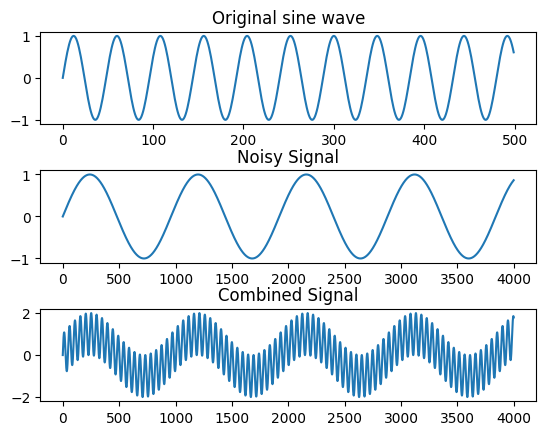

In [36]:
plt.subplot(3,1,1)
plt.title("Original sine wave")

plt.subplots_adjust(hspace=.5)
plt.plot(sine_signal[:500])

plt.subplot(3,1,2)
plt.title("Noisy Signal")
plt.plot(noisy_signal[:4000])

plt.subplot(3,1,3)
plt.title("Combined Signal")
plt.plot(combined_signal[:4000])
plt.show()


(0.0, 1200.0)

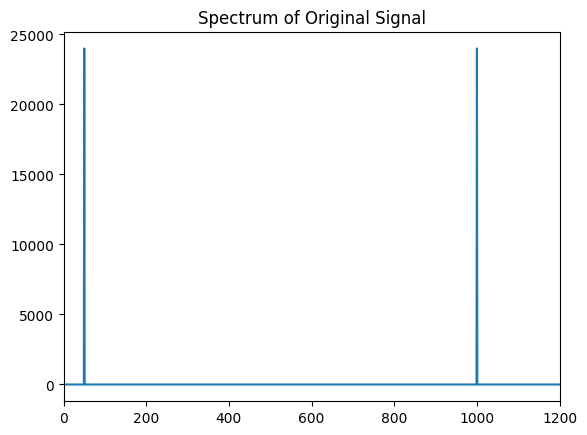

In [37]:
data_fft=np.fft.fft(combined_signal)
freq=(np.abs(data_fft[:len(data_fft)]))
plt.plot(freq)
plt.title("Spectrum of Original Signal")
plt.xlim(0,1200)

Filtering

In [42]:
filtered_freq=[]
index=0


for f in freq:
    if index > 950 and index<1050:
        if f>1:
            filtered_freq.append(f)
        else:
            filtered_freq.append(0)
    else:
        filtered_freq.append(0)
index+=1


One Line code

In [51]:


filterd_freq=[f if(950<index <1050 and f>1)else 0 for index,f in enumerate(freq)]

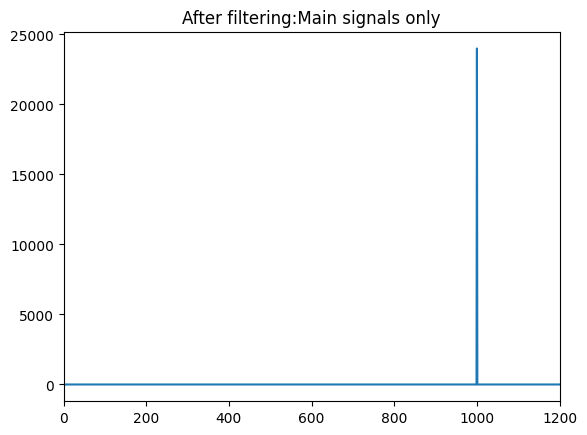

In [52]:
plt.plot(filtered_freq)
plt.title("After filtering:Main signals only")
plt.xlim(0,1200)
plt.show()
plt.close()

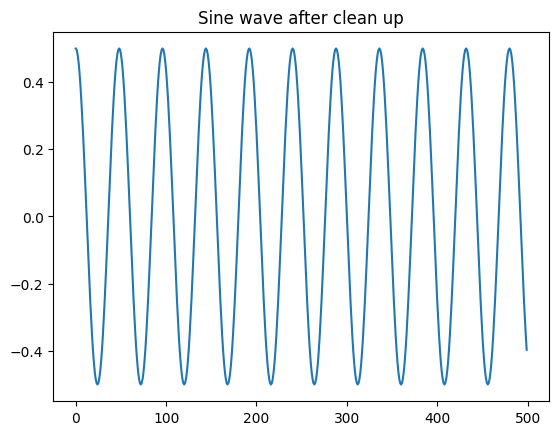

In [53]:
recovered_signal = np.fft.ifft(filtered_freq)
plt.title("Sine wave after clean up")

plt.plot((recovered_signal[:500]))

plt.show()